In [1]:
# Decorations
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import gmplot
import scipy.stats as stats
from config import api_key

In [2]:
# Import database
df1 = pd.read_csv('Data/housing.csv')
df2 = pd.read_csv('Data/Total.csv')
df1 = df1.dropna()

### df1(1990) Analysis

Sort and slice data to get top and bottom 5%

In [3]:
# SSort data by house value
df1 = df1.sort_values('median_house_value', ascending=False).reset_index(drop=True)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.42,34.08,48,2413,261.0,770,248,15.0001,500001,<1H OCEAN
1,-117.66,33.48,22,809,180.0,334,157,2.3846,500001,<1H OCEAN
2,-118.50,33.97,29,2737,808.0,1157,696,5.1280,500001,<1H OCEAN
3,-122.47,37.73,50,1653,252.0,641,224,10.6605,500001,NEAR OCEAN
4,-122.47,37.73,52,2151,280.0,762,274,10.7309,500001,NEAR OCEAN


In [4]:
# Slice the top 5%
top5 = df1.iloc[:round(len(df1['median_house_value'])*0.05), :].sort_values('median_house_value', ascending=False)
top5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.42,34.08,48,2413,261.0,770,248,15.0001,500001,<1H OCEAN
644,-118.56,34.25,31,1962,243.0,697,242,8.5650,500001,<1H OCEAN
632,-118.56,34.24,23,2980,362.0,1208,378,8.1714,500001,<1H OCEAN
633,-118.41,34.07,52,3562,394.0,1163,361,15.0001,500001,<1H OCEAN
634,-118.41,34.07,52,1202,142.0,408,138,15.0001,500001,<1H OCEAN


In [5]:
# slice the bottom 5%
bottom5 = df1.iloc[round(len(df1['median_house_value'])*0.95): len(df1['median_house_value']),:].sort_values('median_house_value', ascending=True)
bottom5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20432,-122.74,39.71,16,255,73.0,85,38,1.6607,14999,INLAND
20429,-117.86,34.24,52,803,267.0,628,225,4.1932,14999,INLAND
20431,-123.17,40.31,36,98,28.0,18,8,0.5360,14999,INLAND
20430,-117.02,36.40,19,619,239.0,490,164,2.1000,14999,INLAND
20428,-118.33,34.15,39,493,168.0,259,138,2.3667,17500,<1H OCEAN


Plotting Top 5% and Bottom 5% on gmap (Use gmplot package)

In [6]:
# Set the center of the map
gmap = gmplot.GoogleMapPlotter(top5['latitude'].median(),
                                   top5['longitude'].median(), 100000)
# Plot scatter points based on LatLng
gmap.scatter(top5['latitude'], top5['longitude'], '#FF0000', 
                              size = 2000, marker = False ) 
gmap.scatter(bottom5['latitude'], bottom5['longitude'], '#110870', 
                              size = 2000, marker = False ) 
# Draw out to 'Plot' folder in html format
gmap.draw("Plot/gmap.html")

Based on the plot, we can assume that the median house value is heavliy influenced by their location.

Now we clean our data and create a new dataframe with informations we need

First, we look at the relationship between income and house value

Text(0.5,1,'House Value vs. Income')

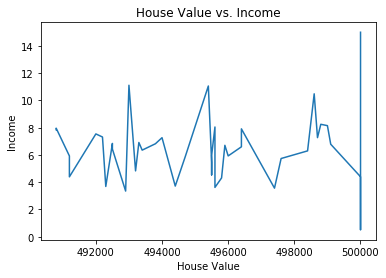

In [7]:
plt.plot(top5['median_house_value'], top5['median_income'])
plt.xlabel('House Value')
plt.ylabel('Income')
plt.title('House Value vs. Income')

Above plot shows that there's no visible correlation between income and house value, since there's no specifice trending (increase nor decrease) in house value as income increase. Rather, we can see that people with lower income(for example, for income=2) live in more expensive houses. 

It is also possible that number of rooms/bedrooms are related to house value

## Whole 1990 data Total Rooms vs Population

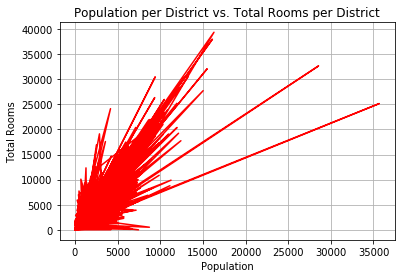

In [8]:
plt.plot(df1['population'], df1['total_rooms'], c='r')
plt.title('Population per District vs. Total Rooms per District')
plt.xlabel('Population')
pop_vs_rooms = plt.ylabel('Total Rooms')
plt.grid()
plt.savefig("Plot/pop_vs_rooms.png", dpi=300)
plt.show()

We make a little subgroups to see their effect on population:

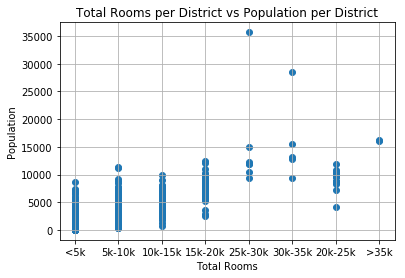

In [9]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
group_names = ["<5k", "5k-10k", "10k-15k", "15k-20k", "20k-25k", "25k-30k", "30k-35k", ">35k"]
df1["total_rooms_groups"] = pd.cut(df1['total_rooms'], bins, labels=group_names)

plt.scatter(df1['total_rooms_groups'], df1['population'])
plt.xlabel('Total Rooms')
plt.ylabel('Population')
plt.title('Total Rooms per District vs Population per District')
plt.grid()
plt.savefig("Plot/pop_vs_rooms_sub_groups.png", dpi=300)
plt.show()

## Top 5 House Values vs Population

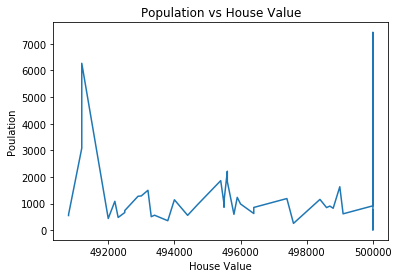

In [10]:
plt.plot(top5['median_house_value'], top5['population'])
plt.xlabel('House Value')
plt.ylabel('Poulation')
plt.title('Population vs House Value')
plt.savefig("Plot/Top5_PHV_nosubgroup.png")
plt.show()

As the above diagrams is not good results especially at high price, we devided the population by sub-groups:

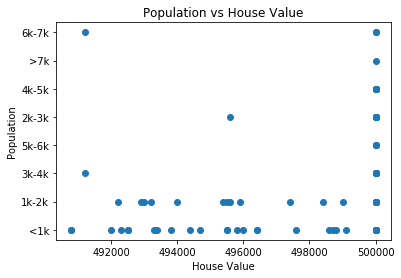

In [11]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
group_names = ["<1k", "1k-2k", "2k-3k", "3k-4k", "4k-5k", "5k-6k", "6k-7k", ">7k"]
top5["population_groups"] = pd.cut(top5['population'], bins, labels=group_names)

plt.scatter(top5['median_house_value'], top5['population_groups'])
plt.xlabel('House Value')
plt.ylabel('Population')
plt.title('Population vs House Value')
plt.savefig("Plot/Top5_PHV.png")
plt.show()

For the most expensive top 5 percent, we can see that lower poulation can be in any house with various prices and the higher poulation lives in the most expensive ones (the bigger blocks are more expensive they are).

## Bottom 5 House Values vs Population

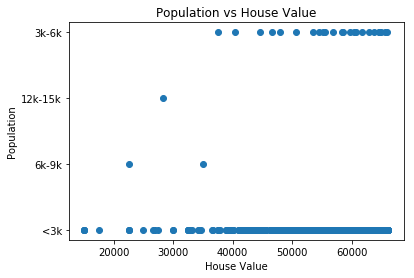

In [12]:
bins = [0, 3000, 6000, 9000, 12000, 15000, 18000]
group_names = ["<3k", "3k-6k", "6k-9k", "9k-12k", "12k-15k", ">15k"]
bottom5["population_groups"] = pd.cut(bottom5['population'], bins, labels=group_names)

plt.scatter(bottom5['median_house_value'], bottom5['population_groups'])
plt.xlabel('House Value')
plt.ylabel('Population')
plt.title('Population vs House Value')
plt.savefig("Plot/Bottom5_PHV.png")
plt.show()

We can see that lower poulation can be in any house with various prices and interstingly the higher poulation has the same condition for the cheap price houses.

## Ocean Proximity vs Count of Houses

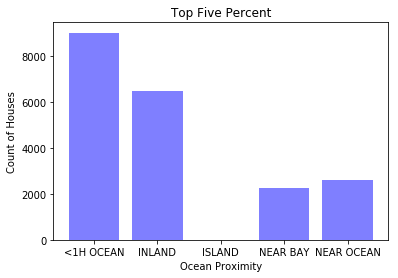

In [13]:
x_axis_op = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = df1.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, color='b', alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Top Five Percent")
plt.savefig("Plot/all_NOP.png")
plt.show()

The process shows that people totally in 1990 preferred to live near the ocean.

## Top 5 Percent Ocean Proximity vs Count of Houses

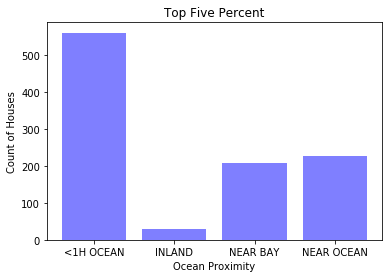

In [14]:
x_axis_op = ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = top5.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, color='b', alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Top Five Percent")
plt.savefig("Plot/Top5_NOP.png")
plt.show()

## Bottom 5 Percent Ocean Proximity vs Count of Houses

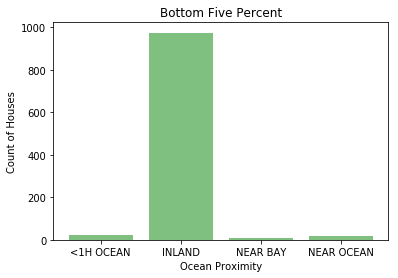

In [15]:
x_axis_op = ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = bottom5.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, color='g', alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Bottom Five Percent")
plt.savefig("Plot/Bottom5_NOP.png")
plt.show()

Comparison between two bar charts show that there is a tendancy of living near ocean/bay rather than inland.

## Top Five Ocean Proximity Average Median Price

In [16]:
op_mean_house_value_top = top5.groupby("ocean_proximity")["median_house_value"].mean().round(2)
op_mean_df_top = pd.DataFrame(op_mean_house_value_top)
op_mean_df_top.rename(columns={"median_house_value":"Average Median Price"})

,Average Median Price
ocean_proximity,
<1H OCEAN,499800.76
INLAND,500000.96
NEAR BAY,499829.92
NEAR OCEAN,499811.10


## Bottom Five Ocean Proximity Average Median Price

In [17]:
op_mean_house_value_bottom = bottom5.groupby("ocean_proximity")["median_house_value"].mean().round(2)
op_mean_df_bottom = pd.DataFrame(op_mean_house_value_bottom)
op_mean_df_bottom.rename(columns={"median_house_value":"Average Median Price"})

,Average Median Price
ocean_proximity,
<1H OCEAN,51416.67
INLAND,55907.90
NEAR BAY,43271.43
NEAR OCEAN,52076.47


## Top Five Ocean Proximity Max Median Price

In [18]:
op_max_house_value_top = top5.groupby("ocean_proximity")["median_house_value"].max().round(2)
op_max_df_top = pd.DataFrame(op_max_house_value_top)
op_max_df_top.rename(columns={"median_house_value":"Average Median Price"})

,Average Median Price
ocean_proximity,
<1H OCEAN,500001
INLAND,500001
NEAR BAY,500001
NEAR OCEAN,500001


## Top Five Ocean Proximity Min Median Price

In [19]:
op_min_house_value_top = top5.groupby("ocean_proximity")["median_house_value"].min().round(2)
op_min_df_top = pd.DataFrame(op_min_house_value_top)
op_min_df_top.rename(columns={"median_house_value":"Average Median Price"})

,Average Median Price
ocean_proximity,
<1H OCEAN,490800
INLAND,500000
NEAR BAY,492000
NEAR OCEAN,491200


## Bottom Five Ocean Proximity Max Median Price

In [20]:
op_max_house_value_bot = bottom5.groupby("ocean_proximity")["median_house_value"].max().round(2)
op_max_df_bot = pd.DataFrame(op_max_house_value_bot)
op_max_df_bot.rename(columns={"median_house_value":"Average Median Price"})

,Average Median Price
ocean_proximity,
<1H OCEAN,62700
INLAND,66200
NEAR BAY,60000
NEAR OCEAN,65700


## Bottom Five Ocean Proximity Min Median Price

In [21]:
op_min_house_value_bot = bottom5.groupby("ocean_proximity")["median_house_value"].min().round(2)
op_min_df_top = pd.DataFrame(op_min_house_value_bot)
op_min_df_top.rename(columns={"median_house_value":"Average Median Price"})

,Average Median Price
ocean_proximity,
<1H OCEAN,17500
INLAND,14999
NEAR BAY,22500
NEAR OCEAN,22500


The data above shows that although the inland in top 5 are not preferred, their price was higher in year 1990.

### df2(2018) Analysis 

In [22]:
df2.head()

,Unnamed: 0,Listing ID,S,Sub Type,St#,St Name,City,MLS Area,SLC,L/C Price,...,Br/Ba,Sqft,YrBuilt,Ac/LSqft,DOM/CDOM,View YN,Pool Private YN,BAC,Contract Status Change Date,MLS
0,1,180048066,S,MANL/D,12,Via Veneto #12,CHU,NaN,NaN,"$89,000",...,"2/2,0,0,0",1000/P,2006,NaN,8-Aug,NaN,N,2500,9/14/2018,SAND
1,1,180047253,S,CONDO/A,1653,Pentecost Way #1,SD,NaN,NaN,"$158,000",...,"1/1,0,0,0",668/A,1980,NaN,1-Jan,NaN,N,2.5,9/7/2018,SAND
2,1,180046958,S,CONDO/A,6101,Adelaide Ave #107,SD,NaN,NaN,"$168,250",...,"0/1,0,0,0",299/A,1984/ASR,NaN,5-May,NaN,N,2.5,9/14/2018,SAND
3,1,180047651,S,CONDO/A,589 N,Johnson #137,ELC,NaN,NaN,"$175,000",...,"2/1,0,0,0",883/,1980,NaN,4-Apr,NaN,N,500,8/28/2018,SAND
4,1,180051931,S,SFR,3138,Roadrunner,BSPG,NaN,NaN,"$190,000",...,"2/2,0,0,0",1356/A,1986,NaN,0/135,NaN,N,3,9/14/2018,SAND


In [23]:
# Keep only the columns that are useful 
df2 = df2[['Sub Type', 'St#', 'St Name', 'City', 'L/C Price', 'Br/Ba', 'YrBuilt']]
df2.head()
#df2 = df2.drop(on=0)

,Sub Type,St#,St Name,City,L/C Price,Br/Ba,YrBuilt
0,MANL/D,12,Via Veneto #12,CHU,"$89,000","2/2,0,0,0",2006
1,CONDO/A,1653,Pentecost Way #1,SD,"$158,000","1/1,0,0,0",1980
2,CONDO/A,6101,Adelaide Ave #107,SD,"$168,250","0/1,0,0,0",1984/ASR
3,CONDO/A,589 N,Johnson #137,ELC,"$175,000","2/1,0,0,0",1980
4,SFR,3138,Roadrunner,BSPG,"$190,000","2/2,0,0,0",1986


In [24]:
yr_blt = df2.loc[:, 'YrBuilt'].str.split('/', expand=True)[0]
yr_blt = pd.DataFrame(yr_blt)
yr_blt = yr_blt.fillna(0)

In [25]:
df2['Age'] = ''
count = 0
for i in yr_blt[0]:
        i = 2018 - int(i)
        df2['Age'][count] = i
        count += 1
df2.head()

,Sub Type,St#,St Name,City,L/C Price,Br/Ba,YrBuilt,Age
0,MANL/D,12,Via Veneto #12,CHU,"$89,000","2/2,0,0,0",2006,12
1,CONDO/A,1653,Pentecost Way #1,SD,"$158,000","1/1,0,0,0",1980,38
2,CONDO/A,6101,Adelaide Ave #107,SD,"$168,250","0/1,0,0,0",1984/ASR,34
3,CONDO/A,589 N,Johnson #137,ELC,"$175,000","2/1,0,0,0",1980,38
4,SFR,3138,Roadrunner,BSPG,"$190,000","2/2,0,0,0",1986,32


In [26]:
df2['house_price'] = df2.loc[:, 'L/C Price'].str.split('$', expand=True)[1] 

In [27]:
df2.head()

,Sub Type,St#,St Name,City,L/C Price,Br/Ba,YrBuilt,Age,house_price
0,MANL/D,12,Via Veneto #12,CHU,"$89,000","2/2,0,0,0",2006,12,"89,000"
1,CONDO/A,1653,Pentecost Way #1,SD,"$158,000","1/1,0,0,0",1980,38,"158,000"
2,CONDO/A,6101,Adelaide Ave #107,SD,"$168,250","0/1,0,0,0",1984/ASR,34,"168,250"
3,CONDO/A,589 N,Johnson #137,ELC,"$175,000","2/1,0,0,0",1980,38,"175,000"
4,SFR,3138,Roadrunner,BSPG,"$190,000","2/2,0,0,0",1986,32,"190,000"


In [28]:
df2_by_value = df2.set_index("L/C Price")
df2_by_value = df2_by_value.reset_index()
df2_by_value.head()

,L/C Price,Sub Type,St#,St Name,City,Br/Ba,YrBuilt,Age,house_price
0,"$89,000",MANL/D,12,Via Veneto #12,CHU,"2/2,0,0,0",2006,12,"89,000"
1,"$158,000",CONDO/A,1653,Pentecost Way #1,SD,"1/1,0,0,0",1980,38,"158,000"
2,"$168,250",CONDO/A,6101,Adelaide Ave #107,SD,"0/1,0,0,0",1984/ASR,34,"168,250"
3,"$175,000",CONDO/A,589 N,Johnson #137,ELC,"2/1,0,0,0",1980,38,"175,000"
4,"$190,000",SFR,3138,Roadrunner,BSPG,"2/2,0,0,0",1986,32,"190,000"


### Getting LatLng using geocoder API for df2

In [33]:
# import CityCode
citycode_df = pd.read_csv('Data/CleanCityCode_nospace.csv')
citycode_df = citycode_df[['City', 'Code']]
citycode_df['Code'] = citycode_df['Code'].str.strip()

In [34]:
df2_by_value['City Name'] = ""
for index, row in df2_by_value.iterrows():
    for i, r in citycode_df.iterrows():
        if r['Code'] == row['City']:
            row['City Name'] = r['City']
            if index%50 == 0:
                print(index)

0
50
100
150
150
200
250
300
300
350
450
500
550
600
650
700
750
800
850
900
1050
1100
1150
1200
1250
1300
1300
1350
1450
1500
1550
1600
1650
1700
1750
1800
1900
2050
2100
2150
2150
2200
2250
2300
2400
2450
2550
2600
2650
2700
2750
2800
2850
2900
2900
2950
3000
3050
3100
3150
3150
3200
3250
3250
3250
3300
3350
3350
3400
3450
3550
3600
3650
3700
3750
3750
3750
3850
3900
3950
4050
4100
4150
4150
4200
4250
4300
4350
4400
4550
4600
4650
4700
4750
4800
4800
4850
4900


In [35]:
df2_by_value.groupby('City Name').count()

,L/C Price,Sub Type,St#,St Name,City,Br/Ba,YrBuilt,Age,house_price,Address,...,"(18, Lat)","(18, Lng)","(19, Lat)","(19, Lng)","(20, Lat)","(20, Lng)","(21, Lat)","(21, Lng)","(22, Lat)","(22, Lng)"
City Name,,,,,,,,,,,,,,,,,,,,,
,4999,4997,4999,4999,4997,4999,4991,4999,4999,4999,...,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999


In [36]:
df2_by_value["Address"] = df2_by_value["St#"].astype(str) + " " + df2_by_value["St Name"].astype(str) + " " + df2_by_value['City']
df2_by_value['Lat'] = ""
df2_by_value['Lng'] = ""

In [37]:
df2_by_value.to_csv("Data/df2_latlng.csv")

### Plotting df2_latlng

In [38]:
df2_latlng = pd.read_csv("Data/df2_latlng.csv")
df2_latlng

,Unnamed: 0,L/C Price,Sub Type,St#,St Name,City,Br/Ba,YrBuilt,Age,house_price,...,"(18, 'Lng')","(19, 'Lat')","(19, 'Lng')","(20, 'Lat')","(20, 'Lng')","(21, 'Lat')","(21, 'Lng')","(22, 'Lat')","(22, 'Lng')",City Name
0,0,"$89,000",MANL/D,12,Via Veneto #12,CHU,"2/2,0,0,0",2006,12,"89,000",...,-117.227676,39.728131,-121.877296,32.958931,-117.110339,33.190686,-117.240628,34.085893,-117.597113,NaN
1,1,"$158,000",CONDO/A,1653,Pentecost Way #1,SD,"1/1,0,0,0",1980,38,"158,000",...,-117.227676,39.728131,-121.877296,32.958931,-117.110339,33.190686,-117.240628,34.085893,-117.597113,NaN
2,2,"$168,250",CONDO/A,6101,Adelaide Ave #107,SD,"0/1,0,0,0",1984/ASR,34,"168,250",...,-117.227676,39.728131,-121.877296,32.958931,-117.110339,33.190686,-117.240628,34.085893,-117.597113,NaN
3,3,"$175,000",CONDO/A,589 N,Johnson #137,ELC,"2/1,0,0,0",1980,38,"175,000",...,-117.227676,39.728131,-121.877296,32.958931,-117.110339,33.190686,-117.240628,34.085893,-117.597113,NaN
4,4,"$190,000",SFR,3138,Roadrunner,BSPG,"2/2,0,0,0",1986,32,"190,000",...,-117.227676,39.728131,-121.877296,32.958931,-117.110339,33.190686,-117.240628,34.085893,-117.597113,NaN
5,5,"$215,000",CONDO/A,9859,Mission Viejo Ct #3,SAN,"2/1,0,0,0",1972,46,"215,000",...,-117.227676,39.728131,-121.877296,32.958931,-117.110339,33.190686,-117.240628,34.085893,-117.597113,NaN
6,6,"$242,000",CONDO/A,5648,Amaya Dr #136,LMSA,"1/1,0,0,0",1997,21,"242,000",...,-117.227676,39.728131,-121.877296,32.958931,-117.110339,33.190686,-117.240628,34.085893,-117.597113,NaN
7,7,"$245,000",CONDO/A,6780,Friars Rd #102,SD,"0/1,0,0,0",1972,46,"245,000",...,-117.227676,39.728131,-121.877296,32.958931,-117.110339,33.190686,-117.240628,34.085893,-117.597113,NaN
8,8,"$247,000",SFR/D,1108 S,Berry DR,MDRA,"3/2,0,0,0",2008/PUB,10,"247,000",...,-117.227676,39.728131,-121.877296,32.958931,-117.110339,33.190686,-117.240628,34.085893,-117.597113,NaN
9,9,"$250,000",CONDO/A,7747,Margerum Ave #232,SD,"1/1,0,0,0",1978,40,"250,000",...,-117.227676,39.728131,-121.877296,32.958931,-117.110339,33.190686,-117.240628,34.085893,-117.597113,NaN


In [39]:
# Set the center of the map
gmap_df2 = gmplot.GoogleMapPlotter(df2_latlng['Lat'].median(),
                                df2_latlng['Lng'].median(), 100000)
# Plot scatter points based on LatLng
gmap_df2.scatter(df2_latlng['Lat'], df2_latlng['Lng'], '#FF0000', 
                              size = 10000, marker = False) 
# Draw out to 'Plot' folder in html format
gmap_df2.draw("Plot/gmap_df2.html")

## df1 vs df2